# Brest Cancer test

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm



In [2]:
df=pd.read_csv('bdiag.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [4]:
df.isnull().sum().sum()

0

In [5]:
x = df.drop(['id','diagnosis'],axis=1)
y = df[['diagnosis']]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

1 90.42553191489363
2 91.48936170212765
3 94.68085106382979
4 93.61702127659575
5 95.74468085106383
6 93.61702127659575
7 94.68085106382979
8 94.68085106382979
9 95.74468085106383
10 93.61702127659575
11 96.80851063829788
12 95.74468085106383
13 94.68085106382979
14 94.68085106382979
15 94.68085106382979
16 94.68085106382979
17 94.68085106382979
18 94.68085106382979
19 94.68085106382979
20 93.61702127659575


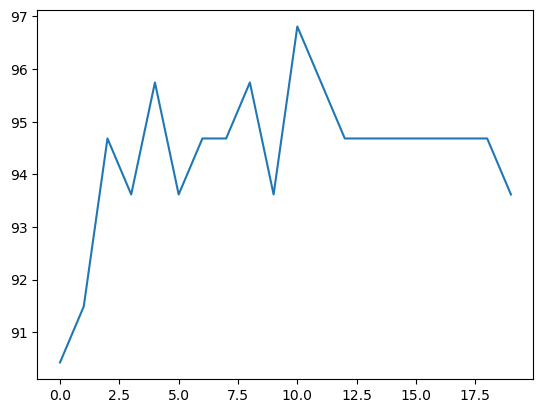

In [7]:
lis =[]
for i in range (1,21):
    model = KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_cv)
    lis.append(accuracy_score(y_cv, y_pred)*100)
    print(i, accuracy_score(y_cv, y_pred)*100)
#     print(classification_report(y_cv, y_pred))
#     print(confusion_matrix(y_cv, y_pred))
plt.plot(lis)

In [8]:
model = KNeighborsClassifier(11)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9893617021276596
              precision    recall  f1-score   support

           B       0.98      1.00      0.99        62
           M       1.00      0.97      0.98        32

    accuracy                           0.99        94
   macro avg       0.99      0.98      0.99        94
weighted avg       0.99      0.99      0.99        94

[[62  0]
 [ 1 31]]


standard scaller
check corelations
do knn with hyper parameter tuning
now remove unimportant features
do knn again

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_array = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_array, index=X_train.index, columns=X_train.columns)
x_array = scaler.transform(X_test)
x_test = pd.DataFrame(x_array, index=X_test.index, columns=X_test.columns)
x_array = scaler.transform(X_cv)
x_cv = pd.DataFrame(x_array, index=X_cv.index, columns=X_test.columns)
df=pd.concat([x_train,y_train])

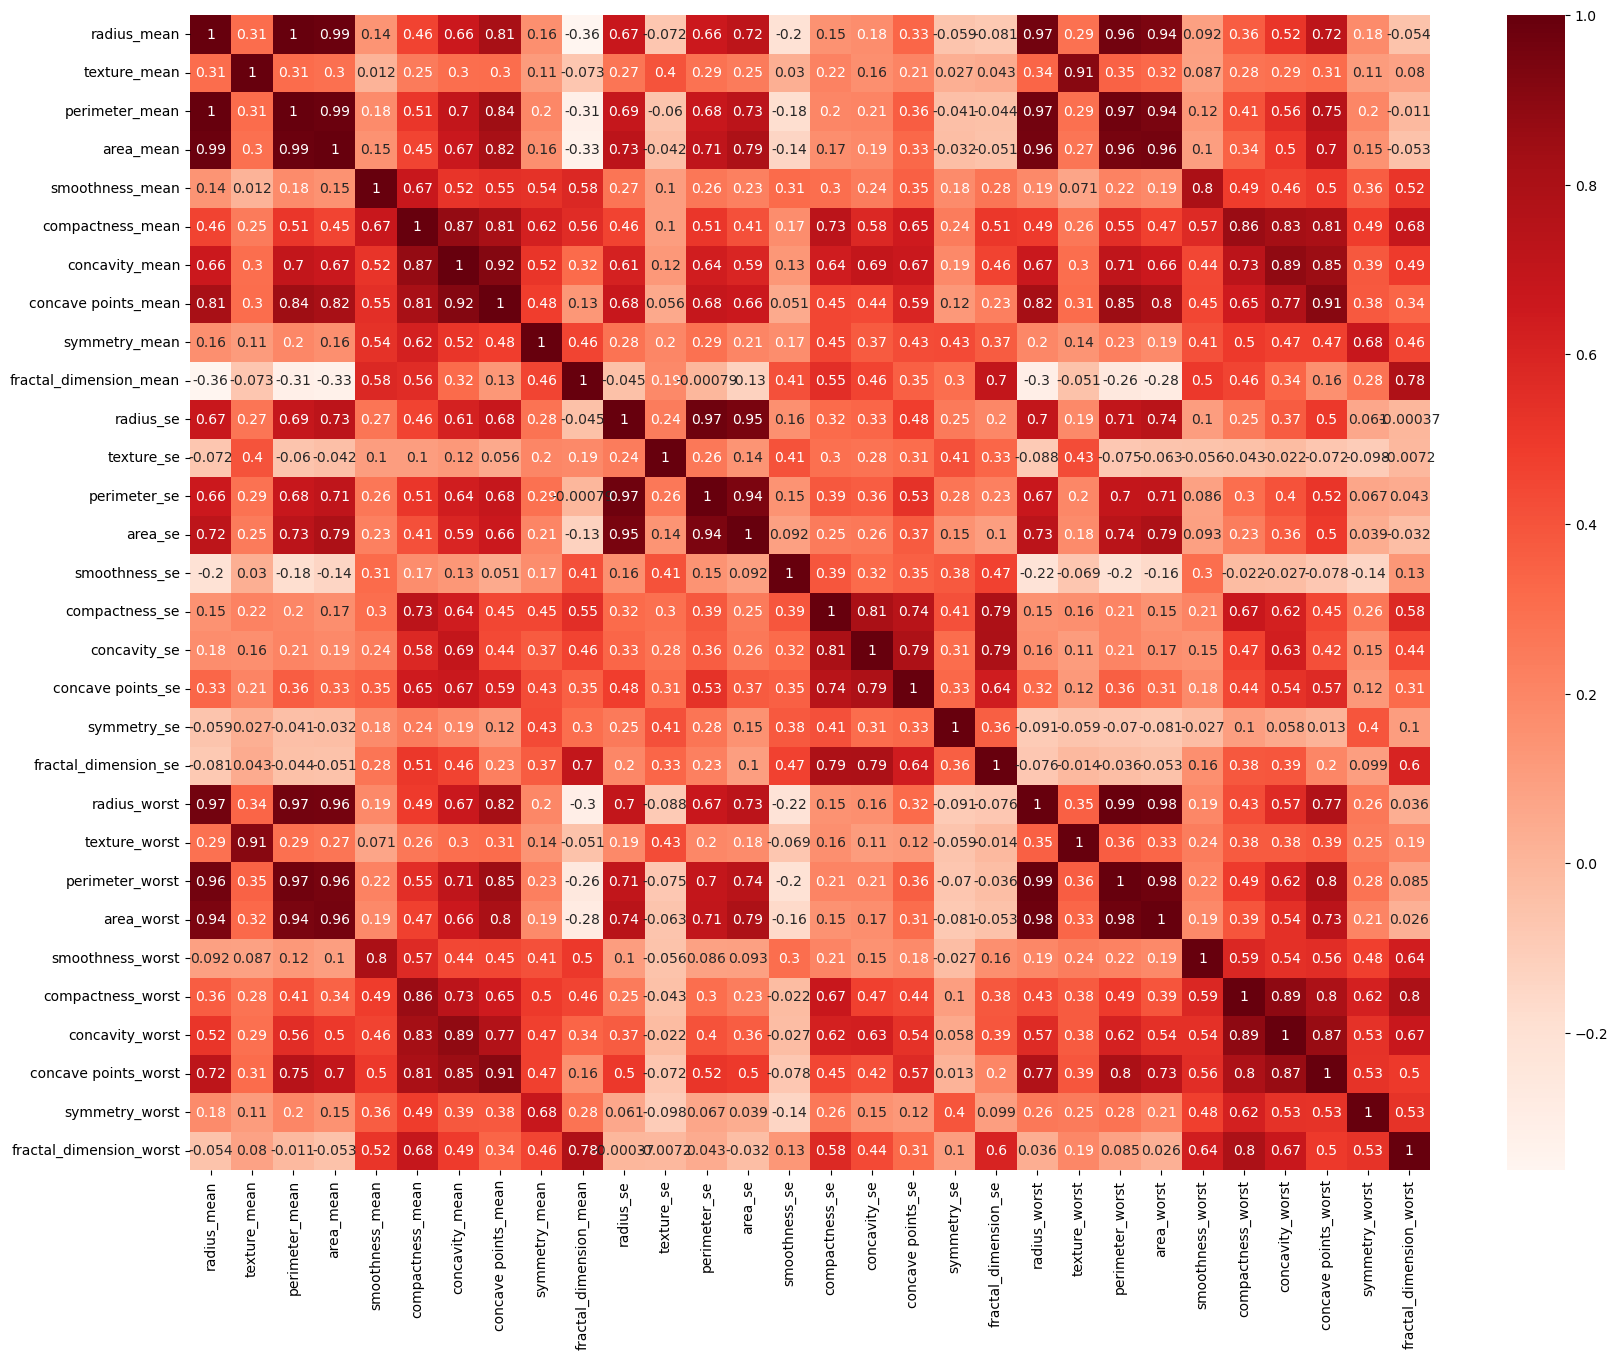

In [10]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

1 91.48936170212765
2 93.61702127659575
3 92.5531914893617
4 93.61702127659575
5 92.5531914893617
6 93.61702127659575
7 93.61702127659575
8 94.68085106382979
9 94.68085106382979
10 94.68085106382979
11 94.68085106382979
12 94.68085106382979
13 94.68085106382979
14 94.68085106382979
15 94.68085106382979
16 94.68085106382979
17 94.68085106382979
18 94.68085106382979
19 94.68085106382979
20 94.68085106382979
21 94.68085106382979
22 95.74468085106383
23 95.74468085106383
24 95.74468085106383
25 95.74468085106383
26 95.74468085106383
27 95.74468085106383
28 95.74468085106383
29 95.74468085106383
30 95.74468085106383
31 95.74468085106383
32 95.74468085106383
33 95.74468085106383
34 95.74468085106383
35 95.74468085106383
36 95.74468085106383
37 95.74468085106383
38 95.74468085106383
39 95.74468085106383
40 95.74468085106383
41 95.74468085106383
42 95.74468085106383
43 95.74468085106383
44 95.74468085106383
45 95.74468085106383
46 95.74468085106383
47 95.74468085106383
48 95.74468085106383
49 

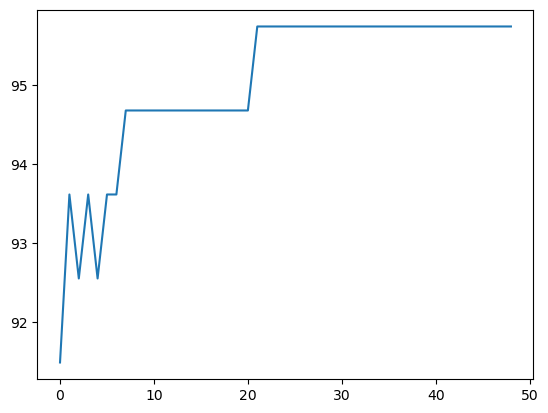

In [11]:
# we are doing hyper parameter tuning to test the improvement after scaling
lis =[]
for i in range (1,50):
    model = KNeighborsClassifier(i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_cv)
    lis.append(accuracy_score(y_cv, y_pred)*100)
    print(i, accuracy_score(y_cv, y_pred)*100)
#     print(classification_report(y_cv, y_pred))
#     print(confusion_matrix(y_cv, y_pred))
plt.plot(lis)

In [12]:
model = KNeighborsClassifier(11)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9680851063829787
              precision    recall  f1-score   support

           B       0.97      0.98      0.98        62
           M       0.97      0.94      0.95        32

    accuracy                           0.97        94
   macro avg       0.97      0.96      0.96        94
weighted avg       0.97      0.97      0.97        94

[[61  1]
 [ 2 30]]


In [13]:
#  We saw that slight decrease in performance

unable to see anything from the heatmap, so we need to use method to find best features

[0.04895389 0.02135813 0.06780265 0.06340341 0.00978449 0.02473993
 0.03876866 0.0837807  0.00919459 0.0069422  0.0166423  0.00602272
 0.01542649 0.02633487 0.0065421  0.00587915 0.00695705 0.00869129
 0.00724719 0.00546961 0.08635161 0.0251168  0.0724243  0.08046858
 0.02316198 0.02317903 0.06376764 0.1165335  0.01917985 0.00987531]


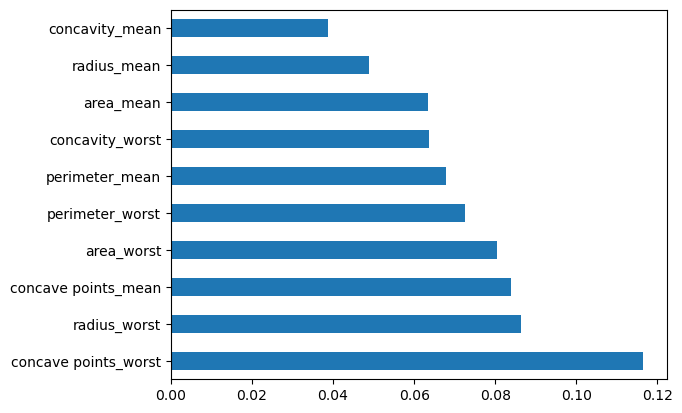

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
best_f = feat_importances.nlargest(10)
best_f = list(best_f.index)
best_f 

['concave points_worst',
 'radius_worst',
 'concave points_mean',
 'area_worst',
 'perimeter_worst',
 'perimeter_mean',
 'concavity_worst',
 'area_mean',
 'radius_mean',
 'concavity_mean']

In [16]:
x_best_f = x_train[best_f]
x_best_f

,concave points_worst,radius_worst,concave points_mean,area_worst,perimeter_worst,perimeter_mean,concavity_worst,area_mean,radius_mean,concavity_mean
172,1.056523,0.511028,1.593877,0.373935,0.521794,0.413031,1.571401,0.206435,0.355820,1.447046
407,-0.896674,-0.392232,-0.789623,-0.414070,-0.473485,-0.394700,-0.432654,-0.404509,-0.373267,-0.351529
56,1.463535,2.023321,1.076488,2.175532,1.866926,1.347999,0.591964,1.346734,1.403358,0.548645
497,-0.136763,-0.462189,-0.658181,-0.480572,-0.437993,-0.483319,-0.337271,-0.499007,-0.479417,-0.670468
301,-0.584631,-0.585641,-0.467040,-0.577302,-0.577874,-0.484132,-0.399521,-0.523181,-0.482211,-0.262323
...,...,...,...,...,...,...,...,...,...,...
71,-1.022324,-1.352487,-0.526477,-1.038324,-1.340514,-1.363815,-0.635470,-1.147585,-1.480026,-0.037279
106,0.117619,-0.651482,-0.365971,-0.628430,-0.656017,-0.697955,0.086934,-0.684708,-0.711272,-0.231911
270,-1.246335,-0.287298,-1.114825,-0.347049,-0.389675,-0.082908,-1.161283,-0.080083,0.028988,-1.035910
435,1.056523,0.150959,0.413779,-0.028013,0.190730,-0.049575,0.687348,-0.171010,-0.057609,0.299019


In [17]:
model2 = KNeighborsClassifier(11)
model2.fit(x_best_f,y_train)
y_pred = model2.predict(x_test[best_f])
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9042553191489362
              precision    recall  f1-score   support

           B       0.93      0.92      0.93        62
           M       0.85      0.88      0.86        32

    accuracy                           0.90        94
   macro avg       0.89      0.90      0.89        94
weighted avg       0.91      0.90      0.90        94

[[57  5]
 [ 4 28]]


now we will do hyper tuning of k

In [18]:
accuracy= []
for i in range(1,50):
    model3 = KNeighborsClassifier(i)
    model3.fit(x_best_f,y_train)
    y_pred = model3.predict(x_test[best_f])
    acc = accuracy_score(y_test, y_pred)
    print(f'accuracy for k ={i} is {acc}')
    accuracy.append(acc)

accuracy for k =1 is 0.9148936170212766
accuracy for k =2 is 0.9042553191489362
accuracy for k =3 is 0.925531914893617
accuracy for k =4 is 0.9361702127659575
accuracy for k =5 is 0.9042553191489362
accuracy for k =6 is 0.9361702127659575
accuracy for k =7 is 0.925531914893617
accuracy for k =8 is 0.925531914893617
accuracy for k =9 is 0.9042553191489362
accuracy for k =10 is 0.9042553191489362
accuracy for k =11 is 0.9042553191489362
accuracy for k =12 is 0.8936170212765957
accuracy for k =13 is 0.8936170212765957
accuracy for k =14 is 0.9042553191489362
accuracy for k =15 is 0.9042553191489362
accuracy for k =16 is 0.9148936170212766
accuracy for k =17 is 0.9148936170212766
accuracy for k =18 is 0.9042553191489362
accuracy for k =19 is 0.925531914893617
accuracy for k =20 is 0.925531914893617
accuracy for k =21 is 0.925531914893617
accuracy for k =22 is 0.9148936170212766
accuracy for k =23 is 0.9042553191489362
accuracy for k =24 is 0.9042553191489362
accuracy for k =25 is 0.9042553

at k = 5 model is not overfit and have good accuracy

In [19]:
model3 = KNeighborsClassifier(4)
model3.fit(x_best_f,y_train)
y_pred = model3.predict(x_test[best_f])
acc = accuracy_score(y_test, y_pred)
print(f'accuracy for k = 4 is {acc}')
accuracy.append(acc)

accuracy for k = 4 is 0.9361702127659575


As we see further decrease in accuracy, so we will use all features
now we will do naive base classification

In [20]:
from sklearn.naive_bayes import GaussianNB  


In [21]:
model4 = GaussianNB(var_smoothing=1e-11)
model4.fit(x_train,y_train)
y_pred = model4.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.925531914893617
              precision    recall  f1-score   support

           B       0.95      0.94      0.94        62
           M       0.88      0.91      0.89        32

    accuracy                           0.93        94
   macro avg       0.91      0.92      0.92        94
weighted avg       0.93      0.93      0.93        94

[[58  4]
 [ 3 29]]


In [22]:

model4 = GaussianNB(var_smoothing=1e-11)
model4.fit(x_best_f,y_train)
y_pred = model4.predict(x_test[best_f])
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9574468085106383
              precision    recall  f1-score   support

           B       0.98      0.95      0.97        62
           M       0.91      0.97      0.94        32

    accuracy                           0.96        94
   macro avg       0.95      0.96      0.95        94
weighted avg       0.96      0.96      0.96        94

[[59  3]
 [ 1 31]]


In [23]:
from sklearn.model_selection import GridSearchCV
gnb = GaussianNB()

# Define the parameter grid
param_grid = {'var_smoothing': [1e-11,1e-10, 1e-9, 1e-8, 1e-7, 1e-6]}  # Specify the values of var_smoothing to be tested

# Perform grid search cross-validation
grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(x_best_f, y_train)

# Get the best var_smoothing value
best_var_smoothing = grid_search.best_params_['var_smoothing']
print("Best var_smoothing:", best_var_smoothing)


Best var_smoothing: 1e-11


In [24]:
from sklearn.linear_model import LogisticRegression  

model5 = LogisticRegression(random_state=0)
model5.fit(x_best_f,y_train)
y_pred = model5.predict(x_test[best_f])
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9574468085106383
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        62
           M       0.94      0.94      0.94        32

    accuracy                           0.96        94
   macro avg       0.95      0.95      0.95        94
weighted avg       0.96      0.96      0.96        94

[[60  2]
 [ 2 30]]


In [25]:
from sklearn.linear_model import LogisticRegression  

model5 = LogisticRegression(random_state=0)
model5.fit(x_train,y_train)
y_pred = model5.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9680851063829787
              precision    recall  f1-score   support

           B       1.00      0.95      0.98        62
           M       0.91      1.00      0.96        32

    accuracy                           0.97        94
   macro avg       0.96      0.98      0.97        94
weighted avg       0.97      0.97      0.97        94

[[59  3]
 [ 0 32]]


In [30]:
param_grid = {
    'C': [.01,.05,.07,0.1, .2,.5,.7,1,1.5,2,5,7, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression model
model = LogisticRegression(random_state=0)

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Print evaluation metrics
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters: {'C': 0.2, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9893617021276596
Classification report:
              precision    recall  f1-score   support

           B       1.00      0.98      0.99        62
           M       0.97      1.00      0.98        32

    accuracy                           0.99        94
   macro avg       0.98      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94

Confusion matrix:
[[61  1]
 [ 0 32]]
